<a href="https://colab.research.google.com/github/eaedk/GalsenAi-Presentations/blob/main/%5BMarch_25th_2023%5D_GalsenAi_Presentation_StepByStep_Guide_To_Get_Started_Zindi_Challenges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Here is the link to go on Zindi and get more info about the dataset](https://zindi.africa/competitions/financial-inclusion-in-africa)

In [1]:
!pip install -qU ydata_profiling scikit-learn 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.9/344.9 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 15.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.5 which is incompatible.


# Imports

In [2]:
# Imports

import pickle
import os
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
from ydata_profiling import ProfileReport
from sklearn import datasets
from subprocess import call

# Setup

In [3]:
# PATHS
DIRPATH = os.path.dirname(os.path.relpath(os.getcwd()))
ASSETS_DIR = os.path.join(DIRPATH, "assets",)
DATASET_DIR = os.path.join(ASSETS_DIR, "dataset")
ML_DIR = os.path.join(ASSETS_DIR, "ml")
SPECIFIC_DATASET_DIR = os.path.join(
    ASSETS_DIR, "dataset", "financial-inclusion-in-africa")
ml_fp = os.path.join(ML_DIR, "ml_components.pkl")
req_fp = os.path.join(ML_DIR, "requirements.txt")
eda_report_fp = os.path.join(ML_DIR, "eda-report.html")

In [4]:
# Download dataset
print(
    f"\n[Info] Download and preparing dataset. \n")
call(
    f"gdown 1BbAgKLqnBM7C2_BU9nzPieN0b2dh0XLm  -O '{DATASET_DIR}/' ", shell=True)

call(
    f"unzip -o '{os.path.join(DATASET_DIR, 'financial-inclusion-in-africa.zip')}' -d '{SPECIFIC_DATASET_DIR}/' ", shell=True)
call(f"mkdir -p {ML_DIR}/ ", shell=True)


[Info] Download and preparing dataset. 



0

# Dataset loading

In [5]:
# import some data to play with
train = pd.read_csv(os.path.join(SPECIFIC_DATASET_DIR, 'Train.csv'))
test = pd.read_csv(os.path.join(SPECIFIC_DATASET_DIR, 'Test.csv'))
ss = pd.read_csv(os.path.join(SPECIFIC_DATASET_DIR, 'SampleSubmission.csv'))
print(
    f"\n[Info] Dataset loaded : shape={train.shape}\n{train.head().to_markdown()}\n")


[Info] Dataset loaded : shape=(23524, 13)
|    | country   |   year | uniqueid   | bank_account   | location_type   | cellphone_access   |   household_size |   age_of_respondent | gender_of_respondent   | relationship_with_head   | marital_status          | education_level                 | job_type                  |
|---:|:----------|-------:|:-----------|:---------------|:----------------|:-------------------|-----------------:|--------------------:|:-----------------------|:-------------------------|:------------------------|:--------------------------------|:--------------------------|
|  0 | Kenya     |   2018 | uniqueid_1 | Yes            | Rural           | Yes                |                3 |                  24 | Female                 | Spouse                   | Married/Living together | Secondary education             | Self employed             |
|  1 | Kenya     |   2018 | uniqueid_2 | No             | Rural           | No                 |                5 |        

In [6]:
pd.read_csv(os.path.join(SPECIFIC_DATASET_DIR, 'VariableDefinitions.csv'))

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


# EDA

In [7]:
target_col = 'bank_account'

# 1 indicates that the individual does have a bank account and 0 indicates that they do not.
target_names = ["no_account", "has_account"]

print("\n", train.info(), "\n",)
print("\n", train.describe(), "\n",)

# pandas profiling
profile = ProfileReport(train, title="Dataset", html={
                        'style': {'full_width': True}})
profile.to_file(eda_report_fp)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB

 None 


                year  household_size  age_of_respo

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Splitting

In [8]:
# Dataset Splitting
# Please specify
to_ignore_cols = [
    "uniqueid",
    target_col
]

# # Force convertion
# train['year'] = train['year'].astype("object")
# train.loc[:,'year'] = train['year'].astype("object")

num_cols = list(set(train.select_dtypes('number')) - set(to_ignore_cols))
cat_cols = list(set(train.select_dtypes(
    exclude='number')) - set(to_ignore_cols))
print(f"\n[Info] The '{len(num_cols)}' numeric columns are : {num_cols}\nThe '{len(cat_cols)}' categorical columns are : {cat_cols}")



[Info] The '3' numeric columns are : ['household_size', 'year', 'age_of_respondent']
The '8' categorical columns are : ['marital_status', 'education_level', 'relationship_with_head', 'cellphone_access', 'job_type', 'country', 'gender_of_respondent', 'location_type']


In [11]:
X, y = train[num_cols+cat_cols], train[target_col].values


X_test = test[num_cols+cat_cols]

In [13]:
X_train, X_eval, y_train, y_eval = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y)
print(
    f"\n[Info] Dataset splitted : (X_train , y_train) = {(X_train.shape , y_train.shape)}, (X_eval y_eval) = {(X_eval.shape , y_eval.shape)}. \n")



[Info] Dataset splitted : (X_train , y_train) = ((18819, 11), (18819,)), (X_eval y_eval) = ((4705, 11), (4705,)). 



In [14]:
X_test.shape

(10086, 11)

# Simple Feature Engineering

In [15]:
# Imputers
num_imputer = SimpleImputer(strategy="mean").set_output(transform="pandas")
cat_imputer = SimpleImputer(
    strategy="most_frequent").set_output(transform="pandas")

In [16]:
# Encoder

cat_ = 'auto'
if len(cat_cols) > 0:
    df_imputed_stacked_cat = cat_imputer.fit_transform(
        pd.concat([train, test], axis=0)[cat_cols])

    cat_ = OneHotEncoder(sparse_output=False, drop="if_binary").fit(
        df_imputed_stacked_cat).categories_

cat_n_uniques = {cat_cols[i]: opts_arr.tolist()
                 for (i, opts_arr) in enumerate(cat_)}
print(
    f"\n[Info] All the available unique values in each category are : {cat_n_uniques}\n")

encoder = OneHotEncoder(categories=cat_, sparse_output=False,
                        drop="first").set_output(transform="pandas")


[Info] All the available unique values in each category are : {'marital_status': ['Divorced/Seperated', 'Dont know', 'Married/Living together', 'Single/Never Married', 'Widowed'], 'education_level': ['No formal education', 'Other/Dont know/RTA', 'Primary education', 'Secondary education', 'Tertiary education', 'Vocational/Specialised training'], 'relationship_with_head': ['Child', 'Head of Household', 'Other non-relatives', 'Other relative', 'Parent', 'Spouse'], 'cellphone_access': ['No', 'Yes'], 'job_type': ['Dont Know/Refuse to answer', 'Farming and Fishing', 'Formally employed Government', 'Formally employed Private', 'Government Dependent', 'Informally employed', 'No Income', 'Other Income', 'Remittance Dependent', 'Self employed'], 'country': ['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], 'gender_of_respondent': ['Female', 'Male'], 'location_type': ['Rural', 'Urban']}



In [17]:
# Scaler
scaler = StandardScaler().set_output(transform="pandas")

In [18]:
X_train_cat, X_train_num = None, None

if len(cat_cols) > 0:
    X_train_cat = encoder.fit_transform(
        cat_imputer.fit_transform(X_train[cat_cols]))

if len(num_cols) > 0:
    X_train_num = scaler.fit_transform(
        num_imputer.fit_transform(X_train[num_cols]))

X_train_ok = pd.concat([X_train_num, X_train_cat], axis=1)

In [19]:
X_train_ok.head()

,household_size,year,age_of_respondent,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,...,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Rwanda,country_Tanzania,country_Uganda,gender_of_respondent_Male,location_type_Urban
13958,-0.356786,-1.143411,-0.834307,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
15901,-0.805246,0.038629,2.015516,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
19496,-0.356786,0.038629,-0.531135,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3770,3.230896,1.220669,-0.046058,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18716,-1.253706,0.038629,1.045363,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [20]:
X_train.shape, X_train_ok.shape

((18819, 11), (18819, 32))

# Modeling

In [21]:
# RandomForestClassifier(random_state=10)
model = AdaBoostClassifier(random_state=10)

# Training
print(
    f"\n[Info] Training.\n[Info] X_train : columns( {X_train.columns.tolist()}), shape: {X_train.shape} .\n")

model.fit(X_train_ok, y_train)


[Info] Training.
[Info] X_train : columns( ['household_size', 'year', 'age_of_respondent', 'marital_status', 'education_level', 'relationship_with_head', 'cellphone_access', 'job_type', 'country', 'gender_of_respondent', 'location_type']), shape: (18819, 11) .



AdaBoostClassifier(random_state=10)


[Info] Evaluation.

              precision    recall  f1-score   support

  no_account       0.90      0.97      0.94      4043
 has_account       0.68      0.35      0.46       662

    accuracy                           0.89      4705
   macro avg       0.79      0.66      0.70      4705
weighted avg       0.87      0.89      0.87      4705



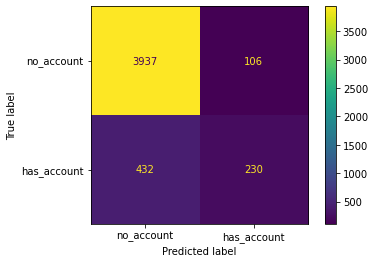

In [22]:
# Evaluation
print(
    f"\n[Info] Evaluation.\n")

X_eval_cat = encoder.transform(
    cat_imputer.transform(X_eval[cat_cols])) if len(cat_cols) > 0 else None

X_eval_num = scaler.transform(
    num_imputer.transform(X_eval[num_cols]))if len(num_cols) > 0 else None

X_eval_ok = pd.concat([X_eval_num, X_eval_cat], axis=1)

y_eval_pred = model.predict(X_eval_ok)

print(classification_report(y_eval, y_eval_pred,
      target_names=target_names))

ConfusionMatrixDisplay.from_predictions(
    y_eval, y_eval_pred, display_labels=target_names)

# First Submission

In [24]:
ss.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


In [25]:
X_test.head()

,household_size,year,age_of_respondent,marital_status,education_level,relationship_with_head,cellphone_access,job_type,country,gender_of_respondent,location_type
0,3,2018,30,Married/Living together,Secondary education,Head of Household,Yes,Formally employed Government,Kenya,Male,Urban
1,7,2018,51,Married/Living together,Vocational/Specialised training,Head of Household,Yes,Formally employed Private,Kenya,Male,Urban
2,3,2018,77,Married/Living together,No formal education,Parent,No,Remittance Dependent,Kenya,Female,Rural
3,6,2018,39,Married/Living together,Primary education,Head of Household,No,Remittance Dependent,Kenya,Female,Rural
4,3,2018,16,Single/Never Married,Secondary education,Child,No,Remittance Dependent,Kenya,Male,Urban


In [26]:
print(
    f"\n[Info] Prediction on Testset.\n")

X_test_cat = encoder.transform(
    cat_imputer.transform(X_test[cat_cols])) if len(cat_cols) > 0 else None

X_test_num = scaler.transform(
    num_imputer.transform(X_test[num_cols]))if len(num_cols) > 0 else None

X_test_ok = pd.concat([X_test_num, X_test_cat], axis=1)

y_test_pred = model.predict(X_test_ok)


[Info] Prediction on Testset.



In [33]:
sub = pd.DataFrame()
sub['unique_id'] = test['uniqueid'] + " x " + test['country']
sub['bank_account'] = y_test_pred

sub['bank_account'] = sub['bank_account'].replace({ "Yes": 1, "No": 0, })

sub.head()

,unique_id,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0


<Axes: >

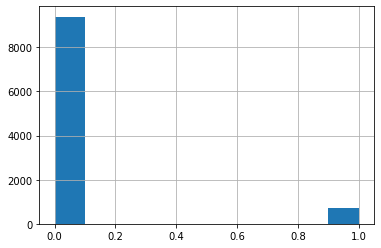

In [35]:
sub['bank_account'].hist()

In [34]:
sub.to_csv( "init_sub.csv",index=False)

# Exportation

In [23]:
# Exportation
print(
    f"\n[Info] Exportation.\n")
to_export = {
    "labels": target_names,
    "num_cols": num_cols,
    "cat_cols": cat_cols,
    "num_imputer": num_imputer,
    "cat_imputer": cat_imputer,
    "scaler": scaler,
    "encoder": encoder,
    "model": model,
}


# save components to file
with open(ml_fp, 'wb') as file:
    pickle.dump(to_export, file)

# Requirements
# ! pip freeze > requirements.txt
call(f"pip freeze > {req_fp}", shell=True)

print(f"[Info] Dictionary to use to as base for dataframe filling :\n", {
      col: [] for col in X_train.columns})



[Info] Exportation.

[Info] Dictionary to use to as base for dataframe filling :
 {'household_size': [], 'year': [], 'age_of_respondent': [], 'marital_status': [], 'education_level': [], 'relationship_with_head': [], 'cellphone_access': [], 'job_type': [], 'country': [], 'gender_of_respondent': [], 'location_type': []}


# [APP Streamlit](https://github.com/eaedk/streamlit-financial-inclusion-app-for-one-by-one-prediction-without-pipeline)